Let's try and see clusters of Categories among the wikipedia articles using the categorylinks.


In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.manifold import Isomap

In [2]:
# Open the file from the repository

with open("cl_epa.txt", "r") as f:
    data=json.load(f)
len(data)

7524

In [3]:
data["25"][:5]

['All_articles_containing_potentially_dated_statements',
 'All_articles_with_dead_external_links',
 'Articles_containing_potentially_dated_statements_from_2014',
 'Articles_with_DMOZ_links',
 'Articles_with_contributors_link']

In [17]:
# I need an array of [[1,2,3... ],[0,3,5...], ...] 
# so I prepare a vocabulary to then use the vectorizer

# Create the all-encompassing vocabulary
import re

def GetVocabList(data_dict):
    #data_dict is a dictionary {keys}:["str1", "str2",..., "strN"]
    #this functions yields ["str1", "str2", ... "strM"], where M is the sum of N over all Keys
    list_categories = []
    cl_index=[]
    for key in data_dict: 
        cl_index.append(key)
        links=[]
        for n in range(len(data_dict[key])):
        
            # Choose which of the following regular expressions to remove
            
            re0="protected_page"
            re1="with_accessdate"
            re2="rticle"
            re3="ikipedia"
            re4="to_be_expanded"
            re5="with_unsourced_statements"
            re6="needing_additional_references"
            re7="lacking_sources"
            re8="containing_potentially_dated_statements"
            re9="with_dead_external_links"
            re10="Certification_Table_Entry_usages_for"
            re11="language_sources"
            re12="rticles_containing"
            re13="page"
            re14="CS1"
            re15="dmy_dates"
            re16="Wiki"
            re17="Pages"
            re18="List"
            re19="list"
            
            Rex=[re0,re1,re2,re3,re4,re5,re6,re7,re8,re9,re10,re11,re12,re13,re14,re15,re16,re17,re18,re19]
            
            if not any(re.search(regex, data_dict[key][n]) for regex in Rex):
                links.append(data_dict[key][n])
        links=" ".join(links)
        list_categories.append(links)
                
    return list_categories, cl_index

# list_categories looks like ["str1 strN", ..., "... str137593"]]. A list strings, each is " ".join(links_in_article)

In [18]:
# Get clean list of links
clean_categories, epa_id = GetVocabList(data)

print(len(clean_categories))
print(len(epa_id))
print(epa_id[3200])
print(data[epa_id[3200]])
print(clean_categories[3200])   #it's a list of strings

7524
7524
17262374
['1990_births', '2014_FIFA_World_Cup_players', '2015_Copa_América_players', 'A.S._Roma_players', 'Association_football_forwards', 'Atlético_Nacional_footballers', 'CS1_Greek-language_sources_(el)', 'CS1_Italian-language_sources_(it)', 'CS1_Spanish-language_sources_(es)', 'Cagliari_Calcio_players', 'Categoría_Primera_A_players', 'Colombia_international_footballers', 'Colombia_under-20_international_footballers', 'Colombian_expatriate_footballers', 'Colombian_expatriates_in_England', 'Colombian_expatriates_in_Greece', 'Colombian_expatriates_in_Italy', 'Colombian_footballers', 'Colombian_people_of_African_descent', 'Expatriate_footballers_in_England', 'Expatriate_footballers_in_Greece', 'Expatriate_footballers_in_Italy', 'Living_people', 'Panathinaikos_F.C._players', 'People_from_Nariño_Department', 'Premier_League_players', 'Serie_A_players', 'Watford_F.C._players', 'Wikipedia_pending_changes_protected_pages_(level_1)', 'Wikipedia_protected_pages_without_expiry']
1990_

In [19]:
clean_categories[3200]

'1990_births 2014_FIFA_World_Cup_players 2015_Copa_América_players A.S._Roma_players Association_football_forwards Atlético_Nacional_footballers Cagliari_Calcio_players Categoría_Primera_A_players Colombia_international_footballers Colombia_under-20_international_footballers Colombian_expatriate_footballers Colombian_expatriates_in_England Colombian_expatriates_in_Greece Colombian_expatriates_in_Italy Colombian_footballers Colombian_people_of_African_descent Expatriate_footballers_in_England Expatriate_footballers_in_Greece Expatriate_footballers_in_Italy Living_people Panathinaikos_F.C._players People_from_Nariño_Department Premier_League_players Serie_A_players Watford_F.C._players'

In [20]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
# This needs a list of strings!!

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_features = vectorizer.fit_transform(clean_categories)

In [21]:
print(type(train_features))
print(train_features.shape)

# Numpy arrays are easy to work with, so convert the result to an 
# array  (instead of a matrix)
train_features_array = train_features.toarray()
print(type(train_features_array))
print(train_features_array.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(7524, 5000)
<class 'numpy.ndarray'>
(7524, 5000)


In [22]:
train_features_array[:50].sum(1)

array([ 1,  2,  5,  5, 10,  0,  2,  0,  2,  0,  4,  1,  0,  1,  2,  5,  2,
       15,  3,  4,  3,  1,  0, 11,  2,  6,  4,  3,  8,  8, 20,  9,  1,  9,
        2, 13,  1,  1,  1, 22,  4,  2,  4,  4,  8,  4,  7,  9,  2,  0], dtype=int64)

In [23]:
# I need to feed the Isomap an array made of a list of lists (with the vectorized values)!

iso = Isomap(n_components=2)
data_projected = iso.fit_transform(train_features_array)

In [24]:
data_projected[:2]

array([[ 0.93773933,  0.03814295],
       [-4.12876408, -0.05055429]])

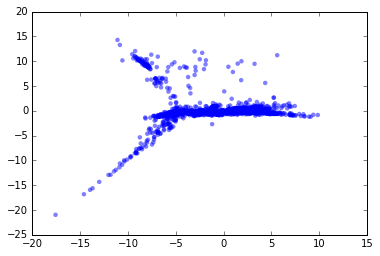

In [25]:
%matplotlib inline

import matplotlib
import pylab as plt

plt.scatter(data_projected[:, 0], data_projected[:, 1], c="blue",
            edgecolor='none', alpha=0.5);   #, cmap=plt.cm.get_cmap('nipy_spectral', 10)
# plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

After removing
"Certification_Table_Entry_usages_for"
"language_sources"
"Articles_containing"
I start to see more texture in the clustering.

In [31]:
for i in range(len(data_projected)):     #  data_projected[i,0]>-1  and data_projected[i,1]<9
    if data_projected[i,0]<-6.5 and data_projected[i,1]>-1.5 and data_projected[i,1]<1:
        print(epa_id[i])
        print(clean_categories[i])

2421536
1984_births African-American_basketball_players American_men's_basketball_players American_people_of_Nigerian_descent Arizona_Wildcats_men's_basketball_players Basketball_players_at_the_2012_Summer_Olympics Basketball_players_from_Illinois Denver_Nuggets_players Golden_State_Warriors_players Living_people National_Basketball_Association_All-Stars Parade_High_School_All-Americans_(boys'_basketball) Philadelphia_76ers_draft_picks Philadelphia_76ers_players Shooting_guards Small_forwards Sportspeople_from_Springfield,_Illinois United_States_men's_national_basketball_team_players Use_mdy_dates_from_August_2012
24891000
Anthropology_writers Anti-racism_activists Cultural_anthropologists Hebrew_University_of_Jerusalem_alumni Israeli_anthropologists Israeli_feminists Israeli_non-fiction_writers Israeli_women's_rights_activists Jewish_feminists Living_people Mizrahi_Jews Racism_in_Israel Social_anthropologists University_of_California,_Berkeley_alumni University_of_California,_Davis_fa

In [16]:
data["20269727"]

['All_articles_with_dead_external_links',
 'Articles_with_French-language_external_links',
 'Articles_with_dead_external_links_from_September_2011',
 'CS1_Norwegian-language_sources_(no)',
 'CS1_Swedish-language_sources_(sv)',
 'CS1_errors:_dates',
 'Dynamic_lists',
 'Lists_of_LGBT-related_people',
 'Official_website_not_in_Wikidata',
 'Use_dmy_dates_from_July_2013',
 'Wikipedia_indefinitely_semi-protected_pages']

########################################################

Now I do a similar analysis for the categories splitted into individual words.

First I need to load the cl_words_epa.txt

Then I need to get the whole vocabulary for the vectorizer

In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.manifold import Isomap

In [ ]:
# Open the file from the repository

with open("cl_words_epa.txt", "r") as f:
    data=json.load(f)
len(data)

In [ ]:
type(data["25"])

In [ ]:
article_index=[]
words_links=[]
for key in data:
    article_index.append(key)
    parole=data[key].split(" ")
    words_links.append(parole)    

In [ ]:
print(article_index[0])
data[article_index[0]]

In [ ]:
words_links[0][:5]

In [ ]:
len(words_links)

In [ ]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
# This needs a list of strings!!

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
vocabulary = vectorizer.fit_transform(words_links)

In [ ]:
print(type(vocabulary))
print(vocabulary.shape)

# Numpy arrays are easy to work with, so convert the result to an 
# array  (instead of a matrix)
vocabulary_array = vocabulary.toarray()
print(type(vocabulary_array))
print(vocabulary_array.shape)

In [ ]:
vocabulary_array[:100].sum(1)  #number of words in categorylinks per article

In [ ]:
# I need to feed the Isomap an array made of a list of lists (with the vectorized values)!

iso = Isomap(n_components=2)
words_projected = iso.fit_transform(vocabulary_array)

In [ ]:
words_projected[:,1]

In [ ]:
%matplotlib inline

import matplotlib
import pylab as plt

plt.scatter(words_projected[:, 0], words_projected[:, 1], c="blue",
            edgecolor='none', alpha=0.5);   #, cmap=plt.cm.get_cmap('nipy_spectral', 10)
# plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [ ]:
for i in range(len(words_projected)):
    if words_projected[i,0]>-50 and words_projected[i,1]>0:
        print(article_index[i])
        print(words_links[i])